In [1]:
import numpy as np

from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

In [2]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import pandas as pd


In [8]:
from pandas.plotting import scatter_matrix

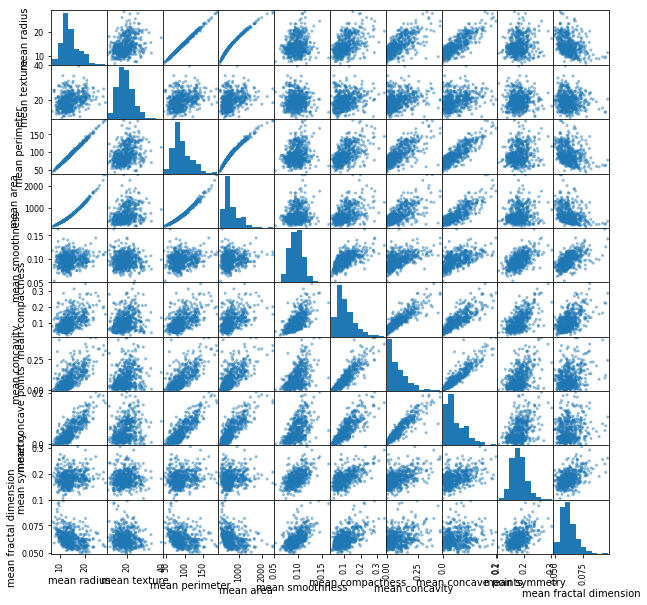

In [10]:
df = pd.DataFrame(data.data[:, 0:10],
                 columns=data.feature_names[0:10])
scatter_matrix(df, figsize=(10,10));

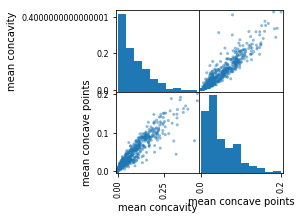

In [11]:
df = pd.DataFrame(data.data[:, 6:8],
                  columns=data.feature_names[6:8])
scatter_matrix(df, figsize=(3,3));

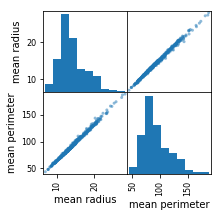

In [12]:
df = pd.DataFrame(data.data[:, [0,2]],
                  columns=data.feature_names[[0,2]])
scatter_matrix(df, figsize=(3,3));

In [13]:
X = data.data[:, [0,2]]
y = data.target
names = data.feature_names[[0,2]]

In [14]:
X.shape, y.shape

((569, 2), (569,))

Text(0, 0.5, 'mean perimeter')

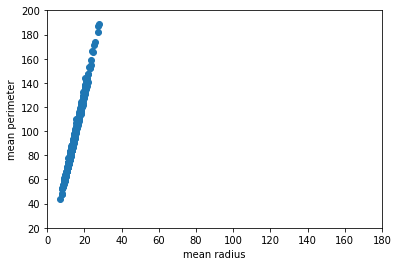

In [15]:
plt.scatter(X[:, 0], X[:, 1])
plt.xlim(0, 180)
plt.ylim(20, 200)
plt.xlabel(names[0])
plt.ylabel(names[1])

In [16]:
#PCAという次元圧縮で、大量のデータから計算に寄与する必要なデータのみ抽出して計算機資源を有効活用する
from sklearn.decomposition import PCA

In [17]:
pca = PCA()

In [18]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [20]:
X_new = pca.transform(X)

In [21]:
plt.scatter(X_new[:, 0], X_new[:, 1])
plt.ylim(-60, 120)

(-60, 120)

In [22]:
pca.explained_variance_

array([6.02807278e+02, 5.21213668e-02])

In [23]:
pca.explained_variance_ / pca.explained_variance_.sum()

array([9.99913543e-01, 8.64569199e-05])

In [24]:
pca.explained_variance_ratio_

array([9.99913543e-01, 8.64569199e-05])

In [25]:
X = data.data[:, [6,7]]
y = data.target
names = data.feature_names[[6,7]]

plt.scatter(X[:, 0], X[:, 1])
plt.xlim(0, 0.5)
plt.ylim(0, 0.5)
plt.xlabel(names[0])
plt.ylabel(names[1])

Text(0, 0.5, 'mean concave points')

In [26]:
pca.fit(X)
X_new = pca.transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1])
plt.xlim(-0.1, 0.4)
plt.ylim(-0.25, 0.25)

(-0.25, 0.25)

In [27]:
pca.explained_variance_

array([0.00767254, 0.00018837])

In [28]:
pca.explained_variance_ratio_ # 寄与率

array([0.97603731, 0.02396269])

In [29]:
# eigで検算
m = X.mean(axis=0)

In [30]:
Xp = (X - m)

In [31]:
C = Xp.transpose().dot(Xp)

In [32]:
w, _ = np.linalg.eig(C)

In [33]:
w

array([4.3580028 , 0.10699332])

In [34]:
w / w.sum() # 寄与率

array([0.97603731, 0.02396269])

In [35]:
# data全体でやる

X = data.data
y = data.target

from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=1, 
                  train_size=0.8, 
                  test_size=0.2, 
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [36]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [38]:
plt.plot(pca.explained_variance_ratio_)

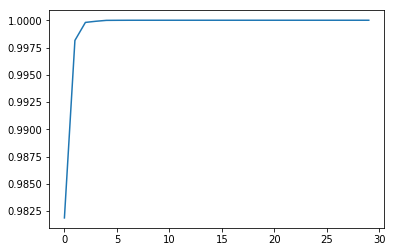

In [39]:
plt.plot(np.add.accumulate(pca.explained_variance_ratio_))

In [40]:
X_train_pca = pca.transform(X_train)
X_test_pca  = pca.transform(X_test)

In [41]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()

In [42]:
clf.fit(X_train_pca, y_train)
clf.score(X_test_pca, y_test)

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9473684210526315

In [43]:
from sklearn.preprocessing import PolynomialFeatures

In [44]:
polf = PolynomialFeatures(degree=2)

In [45]:
polf.fit(X_train)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [46]:
X_train_poly = polf.transform(X_train)
X_test_poly  = polf.transform(X_test)

In [47]:
X_train.shape, X_train_poly.shape

((455, 30), (455, 496))

In [48]:
X_test.shape, X_test_poly.shape

((114, 30), (114, 496))

In [50]:
clf.fit(X_train_poly, y_train)
clf.score(X_test_poly, y_test)

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.956140350877193

In [51]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.956140350877193

In [53]:
pca.fit(X_train_poly)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

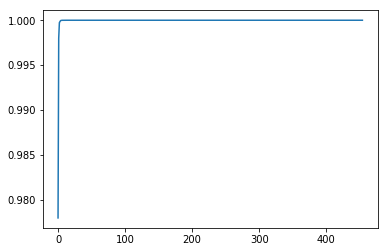

In [54]:
plt.plot(np.add.accumulate(pca.explained_variance_ratio_))

In [55]:
scores = []

n_features = X_train_poly.shape[1]
i_range = range(1, n_features, 10)

X_train_poly_pca = pca.transform(X_train_poly)
X_test_poly_pca  = pca.transform(X_test_poly)

for i in i_range:

    clf.fit(X_train_poly_pca[:, 0:i], y_train)
    
    scores.append( clf.score(X_test_poly_pca[:, 0:i],
                             y_test) )

scores = np.array(scores)

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuk

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\Ap

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\Ap

Text(0.5, 1.0, 'max 0.9737 at 131')

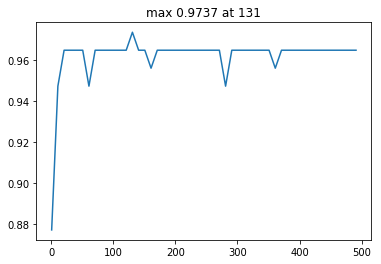

In [56]:
plt.plot(i_range, scores);
plt.title("max {0:.4f} at {1}".format(scores.max(), 
                                      i_range[np.argmax(scores)]))

d= 2
max dimension:  496
i=1,11,21,31,41,51,61,71

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuk

,81,91,101,111,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\Ap

121,131,141,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\Ap

151,161,171,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\Ap

181,191,201,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


211,221,231

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,241,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


251,261,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


271,281,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


291,301,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


311,321,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\Ap

331,341,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


351,361,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


371,381,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


391,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


401,411,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


421,431,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


441,451,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


461,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


471,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


481,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


491,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



d= 3
max dimension:  5456
i=1,11,21,31,41,51,61,71,81,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\

91,101,111,121,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\Ap

131,141,151,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\Ap

161,171,181,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


191,201,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


211,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


221,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


231,241,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


251,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


261,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


271,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


281,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


291,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


301,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


311,321,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


331,341,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


351,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


361,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


371,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


381,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


391,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


401,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


411,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


421,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


431,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


441,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


451,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


461,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


471,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


481,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


491,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



d= 4
max dimension:  46376
i=1,11,21,31,41,51,61,71,81,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\

91,101,111,121,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\Ap

131,141,151,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\Ap

161,171,181,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\Ap

191,201,211,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


221,231,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


241,251,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


261,271,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


281,291,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


301,311,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


321,331,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


341,351,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


361,371,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


381,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


391,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


401,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


411,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


421,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


431,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


441,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


451,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


461,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


471,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


481,

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


491,


C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


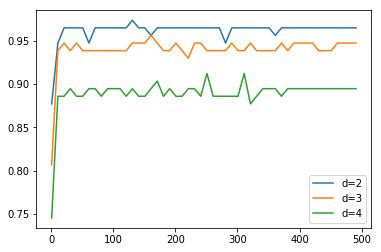

In [57]:
for d in [2, 3, 4]:
    print("d=", d)
    
    polf = PolynomialFeatures(degree=d)
    polf.fit(X_train)
    X_train_poly = polf.transform(X_train)
    X_test_poly  = polf.transform(X_test)

    pca.fit(X_train_poly)
    X_train_poly_pca = pca.transform(X_train_poly)
    X_test_poly_pca  = pca.transform(X_test_poly)
    
    scores = []
    n_features = min(500, X_train_poly.shape[1])
    i_range = range(1, n_features, 10)
    
    print("max dimension: ", X_train_poly.shape[1])

    print("i=", end="")
    for i in i_range:
        print(i, end=",")
        clf.fit(X_train_poly_pca[:, 0:i], y_train)
        scores.append( clf.score(X_test_poly_pca[:, 0:i], y_test) )
    print("")
    
    scores = np.array(scores)
    plt.plot(i_range, scores, label="d={0}".format(d))

plt.legend();